## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [243]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [244]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the cell below to find the number of rows in the dataset.

In [245]:
print('The number of rows in the df is %s' % df.shape[0])

The number of rows in the df is 294478


c. The number of unique users in the dataset.

In [246]:
print('The number of unique users in the df is %s' %len(df.user_id.unique()))

The number of unique users in the df is 290584


d. The proportion of users converted.

In [247]:
len(df[df.converted == 1]) / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [248]:
len(df.query("group == 'treatment' & landing_page == 'old_page'")) + len(
df.query("group == 'control' & landing_page == 'new_page'"))

3893

f. Do any of the rows have missing values?

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [250]:
df2 = df.drop(df.query("group == 'treatment' & landing_page == 'old_page'").index)
df2.drop(df2.query("group == 'control' & landing_page == 'new_page'").index, inplace=True)

In [251]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [252]:
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [253]:
duplicate = df2[df2.user_id.duplicated()]

c. What is the row information for the repeat **user_id**? 

In [254]:
duplicate

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [255]:
df.drop(2893, inplace =True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [256]:
len(df2[df2.converted == 1])/ df2.shape[0]

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [257]:
control_convert = len(df2.query("group == 'control' & converted == 1"))
control = len(df2[df2.group == 'control'])
p_conv_control = control_convert / control
p_conv_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [258]:
treat_convert = len(df2.query("group == 'treatment' & converted == 1"))
treat = len(df2[df2.group == 'treatment'])
p_conv_treat = treat_convert / treat
p_conv_treat

0.11880724790277405

d. What is the probability that an individual received the new page?

In [259]:
len(df2[df2.landing_page == 'new_page'])/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

After appropriately cleaning the data, we can see that there is an approximately equal chance to land on the new page as there is to land on the old page. This makes sure not to introduce unwanted bias. 

We see than the probability of conversion for the control and treatment group are very close to each other (0.12 vs. 0.118), so at this time we do not have enough evidence to conclude that those two groups are different from each other. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} \leq p_{old}$$
$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [260]:
p_new = len(df2[df2.converted ==1])/len(df2)
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [261]:
p_old = p_new
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [262]:
n_new = len(df2[df2.group == 'treatment'])
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [263]:
n_old = len(df2[df2.group == 'control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [264]:
new_page_converted = np.random.choice(2, size= n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [265]:
old_page_converted = np.random.choice(2, size = n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [266]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.00050565837996414953

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [267]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = (new_page_converted/n_new) - (old_page_converted/n_old)
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Looking at the plot below, it appears that the sampling distribution of the difference in conversion rate between old and new page is normally distributed. 

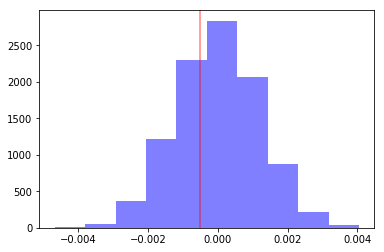

In [268]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs, color = 'blue', alpha =0.5)
plt.axvline(obs_diff, color = 'red', alpha = 0.5);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [269]:
(p_diffs > obs_diff).mean()

0.65910000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p-value is non-significant for an alpha of 0.05. Therefore, based on this, we fail to reject our null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [270]:
import statsmodels.api as sm

convert_old = len(df.query("landing_page == 'old_page' & converted == 1"))
convert_new = len(df.query("landing_page == 'new_page' & converted == 1"))
n_old = len(df2[df2.landing_page == 'old_page'])
n_new = len(df2[df2.landing_page == 'new_page'])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [271]:
stat, p_values = sm.stats.proportions_ztest(count= [convert_new, convert_old], nobs= [n_new, n_old], alternative='larger')

In [272]:
stat, p_values

(-1.3950792582610225, 0.91850402990848123)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Even using the built-in model, there does not appear to be a statistically significant difference in the probability of conversion for new and old page. Once again, we fail to reject the null hypothesis, $H_0$.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We can use Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [273]:
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df['group'])

In [274]:
df2.drop('control', axis = 1, inplace=True)

In [275]:
df2.dropna(inplace=True)
df2.ab_page = df2.ab_page.astype(int)
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1  
3          1        1  
4          1        0

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [276]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [277]:
logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-06 17:25 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with *ab_page* is 0.1899, which is non-significant at alpha 0.05. 
It does differ from part two for two reasons: 
>1. In Part II, our null hypothesis was that the new page was *equal or inferior* to the old page in terms of probability. In logistic regression, we test whether there is any difference, i.e. our $H_0: p_{new} = p_{old}$

>2. In Part II, we were considering average values in the simulations, whereas Logistic Regression considers a point-by-point assessment of the data. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Pros**: It is important to account for confounding variables, as these could explain part of the variability in the data, and therefore accounting for those could improve our accuracy in discerning the true relationship between conversion and the version of the page. 

**Cons**: We also have to be wary not to introduce too many unneccesary covariates, as this can make the model difficult to interpret, and could potentially lead to incorrect results, including incorrect direction of the coefficients as a result of variance inflation factor. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [278]:
countries = pd.read_csv('countries.csv', index_col = 0)
df2.set_index('user_id', inplace=True)
new_df = df2.join(countries)
new_df.head()

timestamp      group landing_page  converted  \
user_id                                                                  
851104   2017-01-21 22:11:48.556739    control     old_page          0   
804228   2017-01-12 08:01:45.159739    control     old_page          0   
661590   2017-01-11 16:55:06.154213  treatment     new_page          0   
853541   2017-01-08 18:28:03.143765  treatment     new_page          0   
864975   2017-01-21 01:52:26.210827    control     old_page          1   

         intercept  ab_page country  
user_id                              
851104           1        0      US  
804228           1        0      US  
661590           1        1      US  
853541           1        1      US  
864975           1        0      US

In [279]:
#Note: we will use 'US' as baseline, so we can see whether being in another country can affect the probability of conversion
new_df[['CA', 'UK', 'US']] = pd.get_dummies(new_df['country'])
new_log = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'CA', 'UK']])
new_log_res = new_log.fit()
new_log_res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-06 17:25 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

We can see that adding informtion about country of provenance does not significantly affect the results.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [280]:
new_log2 = sm.Logit(new_df['ab_page'], new_df[['intercept', 'CA', 'UK']])
new_log2_res = new_log2.fit()
new_log2_res.summary2()

Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   3.0000     
Dependent Variable: ab_page          Pseudo R-squared: 0.000      
Date:               2020-04-06 17:25 AIC:              402839.1669
No. Observations:   290584           BIC:              402870.9058
Df Model:           2                Log-Likelihood:   -2.0142e+05
Df Residuals:       290581           LL-Null:          -2.0142e+05
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
intercept    0.0018     0.0044    0.4144   0.6786   -0.0069   0.0105
CA           0.0124     0.0172    0.7196   0.4718   -0.0213   0.0461
UK          -0.0088     0.0087   -1.0226   0.3065   -0.0258   0.0081
==================================================================

"""

We can see that being in a country other than the US does *not* significantly affect the likelihood of seing one page as compared to users in the US. 

i. Using time in the model: Can a certain time of day or a certain date affect the probability of conversion. In this section, we will provide an optional extra assessment of the impact of timeline in this model. 

In [281]:
#Change type of timestamp column to 'datetime'
new_df['timestamp'] = pd.to_datetime(new_df['timestamp'])
#get date
new_df['date'] = new_df['timestamp'].dt.date
#Transform date to dummy variables. 
date = pd.get_dummies(new_df['date'])
new_df = new_df.join(date)
new_df.head()

timestamp      group landing_page  converted  \
user_id                                                                 
851104  2017-01-21 22:11:48.556739    control     old_page          0   
804228  2017-01-12 08:01:45.159739    control     old_page          0   
661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
864975  2017-01-21 01:52:26.210827    control     old_page          1   

         intercept  ab_page country  CA  UK  US     ...     2017-01-15  \
user_id                                             ...                  
851104           1        0      US   0   0   1     ...              0   
804228           1        0      US   0   0   1     ...              0   
661590           1        1      US   0   0   1     ...              0   
853541           1        1      US   0   0   1     ...              0   
864975           1        0      US   0   0   1     ...              0   

         2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
user_id                                                               
851104            0           0           0           0           0   
804228            0           0           0           0           0   
661590            0           0           0           0           0   
853541            0           0           0           0           0   
864975            0           0           0           0           0   

         2017-01-21  2017-01-22  2017-01-23  2017-01-24  
user_id                                                  
851104            1           0           0           0  
804228            0           0           0           0  
661590            0           0           0           0  
853541            0           0           0           0  
864975            1           0           0           0  

[5 rows x 34 columns]

In [282]:
#get list of x values to use in logistic regression
x = list(new_df.columns)
x= [str(i) for i in x]
rmd = ['timestamp', 'group', 'landing_page', 'converted', 'country', 'US', 'date', '2017-01-02']
for i in rmd:
    x.remove(i)
x
'''Note: we are discarding the first day to see if significant change in conversion probability occurs with
every passing day compared to baseline''' 

'Note: we are discarding the first day to see if significant change in conversion probability occurs with\nevery passing day compared to baseline'

In [283]:
#Change the type of column to string so we can easily refer to them
new_df.columns = [str(i) for i in new_df.columns]
new_df.columns

Index(['timestamp', 'group', 'landing_page', 'converted', 'intercept',
       'ab_page', 'country', 'CA', 'UK', 'US', 'date', '2017-01-02',
       '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
       '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17',
       '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-21', '2017-01-22',
       '2017-01-23', '2017-01-24'],
      dtype='object')

In [284]:
#Run logistic regression model with time variables. 
time_mod = sm.Logit(new_df['converted'], new_df[np.array(x)])
time_res = time_mod.fit()
time_res.summary2()

Optimization terminated successfully.
         Current function value: 0.366073
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-06 17:25 AIC:              212801.6297
No. Observations:   290584           BIC:              213076.7006
Df Model:           25               Log-Likelihood:   -1.0637e+05
Df Residuals:       290558           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -1.9597    0.0409  -47.9265  0.0000  -2.0399  -1.8796
ab_page       -0.0149    0.0114   -1.3071  0.1912  -0.0374   0.0075
CA            -0.0408    0.0269   -1.5179  0.1290  -0.0935   0.0119
UK             0.0101    0.0133    0.7618  0.4462  -0.0159   0.0362
2017-01-03    -0.0860    0.0488   -1.7640  0.0777  -0.1816   0.0096
2017-01-04    -0.0324    0.0485   -0.6686  0.5037  -0.1275   0.0626
2017-01-05    -0.0344    0.0486   -0.7083  0.4788  -0.1297   0.0608
2017-01-06    -0.0309    0.0484   -0.6393  0.5227  -0.1257   0.0639
2017-01-07    -0.0392    0.0485   -0.8089  0.4186  -0.1342   0.0558
2017-01-08    -0.0277    0.0483   -0.5727  0.5669  -0.1224   0.0670
2017-01-09    -0.0367    0.0484   -0.7577  0.4486  -0.1317   0.0582
2017-01-10    -0.0294    0.0483   -0.6086  0.5428  -0.1242   0.0653
2017-01-11    -0.0547    0.0485   -1.1275  0.2595  -0.1497   0.0404
2017-01-12    -0.0050    0.0483   -0.1039  0.9172  -0.0997   0.0897
2017-01-13    -0.0830    0.0488   -1.7006  0.0890  -0.1787   0.0127
2017-01-14     0.0023    0.0483    0.0475  0.9621  -0.0923   0.0969
2017-01-15    -0.0544    0.0485   -1.1203  0.2626  -0.1495   0.0408
2017-01-16    -0.0211    0.0484   -0.4352  0.6634  -0.1160   0.0738
2017-01-17     0.0211    0.0482    0.4386  0.6609  -0.0733   0.1156
2017-01-18     0.0190    0.0482    0.3950  0.6929  -0.0755   0.1136
2017-01-19    -0.0391    0.0485   -0.8068  0.4198  -0.1343   0.0560
2017-01-20    -0.0596    0.0486   -1.2257  0.2203  -0.1548   0.0357
2017-01-21    -0.0174    0.0483   -0.3606  0.7184  -0.1121   0.0773
2017-01-22    -0.0393    0.0485   -0.8117  0.4170  -0.1343   0.0556
2017-01-23     0.0058    0.0482    0.1208  0.9038  -0.0886   0.1002
2017-01-24    -0.0274    0.0539   -0.5083  0.6112  -0.1330   0.0782
==================================================================

"""

We see that, even accounting for the time, there is no specific day that can significantly explain the probability of converting. However, we ca see that on two days (January 3rd and January 13th, there is a trend toward significance, without actually reaching the significance level. 

## Conclusions

We have analyzed a dataset of user interaction with a webpage and tried to find determinants of the probability of conversion, i.e. of an individual becoming a subscriber. We see that the experiment was run for about 20 days and it considered three countries, the US, the UK and Canada. We saw that the new version of the webpage did not significantly affect the probability of conversion compared to the old webpage. This was adjusted by coutry, i.e comapred to being US, being in another country did not significantly affect the probability of conversion under a logistic regression model. Similarly, additional days of exposure did not significantly affect $p_{conversion}$ either. 

We obtained similar results by running hypothesis testing and by running Logistic Regression, with the caveat of using average values in the first and point-by-point values in the latter.

In this experiment, we failed to rehect the null hypothesis that there is no difference between old and new page. At this time we **cannot** recommend our client to invest resources into launching this new webpage. However, we can recommend that the following be taken into consideration to improve on this A/B testing: 
1. It may need a larger sample. 
2. We did not account for the age and other demographics of the users: if the majority of the population is older, they may be change resistant, and therefore our chance of seing a meaningful result with a biased population would be lower. 
3. It may need to run for a longer amount of time: 20 days may be too little to see any difference. Extending to a period of 2 months could potentilly help. 
4. Finally, there may not be a large enough sample of users outside of the US to significantly compare to the US. In the future, expanding on outside users could give us a more realistic picture of global interaction with our new webpage. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [285]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0